In [1]:
import networkx as nx
import numpy as np
import random 
from random import randint
import matplotlib.pyplot as plt
import copy
import operator
import pandas as pd
import time
from collections import deque



In [2]:
def build_instance(n,direction = False,connect_pct = 0.6):
    '''build a network(directed/undirected) with n nodes and randomly assigned weights'''
    '''set cond_pctg so only approx connect_pct nodes are connected'''
    # build undirected graph
    if direction == False:
        G = nx.Graph()
        #adding nodes
        for i in range(0,n):
             G.add_node(i)
        #adding edges with weights randomly
        for i in range(0,n):
            for j in range(i+1,n):
                cond = random.random()  
                if cond <= connect_pct:   # connect_pct chance to connect i and j 
                    G.add_edge(i,j, weight=randint(1, 99)/100.00)   # assign weight randomly
    # build directed graph
    else:
        G = nx.DiGraph()
        #adding nodes
        for i in range(0,n):
             G.add_node(i)
        #adding edges with weights randomly
        for i in range(0,n):
            for j in range(i+1,n):
                cond1 = random.random()
                cond2 = random.random()
                if cond1 <= connect_pct:   # connect_pct chance to connect i -> j 
                    G.add_edge(i,j, weight=randint(0,99)/100)
                if cond2 <= connect_pct:   # connect_pct chance to connect j -> i 
                    G.add_edge(j,i, weight=randint(1, 99)/100)
    return G

def build_instance_weight(n,direction = False,connect_pct = 0.6,fixed_weight = 0.1):
    '''build a network(directed/undirected) with n nodes and randomly assigned weights'''
    '''set cond_pctg so only approx connect_pct nodes are connected'''
    # build undirected graph
    if direction == False:
        G = nx.Graph()
        #adding nodes
        for i in range(0,n):
             G.add_node(i)
        #adding edges with weights randomly
        for i in range(0,n):
            for j in range(i+1,n):
                cond = random.random()  
                if cond <= connect_pct:   # connect_pct chance to connect i and j 
                    G.add_edge(i,j, weight=fixed_weight)   # assign weight randomly
    # build directed graph
    else:
        G = nx.DiGraph()
        #adding nodes
        for i in range(0,n):
             G.add_node(i)
        #adding edges with weights randomly
        for i in range(0,n):
            for j in range(i+1,n):
                cond1 = random.random()
                cond2 = random.random()
                if cond1 <= connect_pct:   # connect_pct chance to connect i -> j 
                    G.add_edge(i,j, weight=fixed_weight)
                if cond2 <= connect_pct:   # connect_pct chance to connect j -> i 
                    G.add_edge(j,i, weight=fixed_weight)
    return G

# plotting graph
def plot_graph(G):
    pos=nx.spring_layout(G)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    nx.draw(G, pos, node_size=300, with_labels=True)
    plt.show()
    

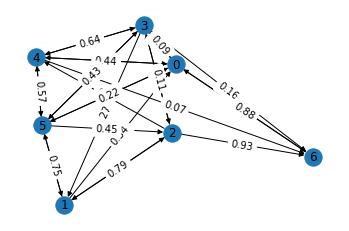

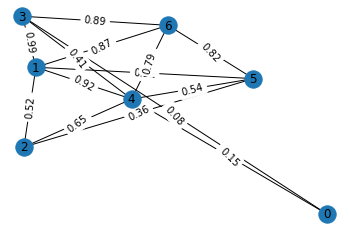

In [3]:
G_di = build_instance(7,direction = True)
G_un = build_instance(7)
plot_graph(G_di)
plot_graph(G_un)

In [4]:
def independent_cascade(G,S,iters = 100):
    '''evaluation function:
    input a graph and a seed set(list), output the expected number of influenced nodes'''
    #S_up is the set of nodes in S that haven't influenced others yet, aka S(t)\S(t-1)
    #S_down is the set of active nodes that in S(t-1)
    num_influenced = 0
    count = 0
    while count <= iters:
        S_up = set(S) #initially, S_up is the seed set
        active = set()
        while S_up: 
            for num, i in enumerate(list(S_up)):
                S_up.remove(i)
#                 S_down.add(i)
                active.add(i) #S_up.union(S_down)
                for j in list(nx.neighbors(G,i)):
                    if j not in active:   # j: not activated nodes
                        if random.random() <= G[i][j]['weight']:  # weight is the success probability:
                            S_up.add(j)     # j is activated if cond < success probability
                          #  print('seed source:',i,'has activated',j)
              #  print('current active nodes are:',S_up+S_down)
        count += 1
       # print('number of influenced nodes:',len(S_up + S_down))        
        num_influenced += len(active)
    return num_influenced/iters
        

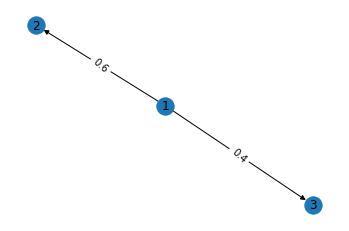

Evaluation score: 1.994
Expected value: 2.0


In [5]:
# test independent_cascade with simple example
G_s = nx.DiGraph()
G_s.add_nodes_from(range(1,3))
G_s.add_edge(1,2,weight = 0.6)
G_s.add_edge(1,3,weight = 0.4)
plot_graph(G_s)
print('Evaluation score:',independent_cascade(G_s,[1],500))
print('Expected value:',2*0.6*0.6+2*0.4*0.4+1*0.6*0.4+3*0.6*0.4)

In [88]:
def random_pick(G,k):
    '''randomly return a list of k nodes as intial seeds in G'''
    return random.sample(list(G.nodes),k)


def top_k(G,k,iters = 100):
    '''return a list of top k most influencial seeds as a single intial seed'''
    candidate = dict() # a dictionary with key: seed name; value: expected number of active nodes
    for seed in G.nodes:
        candidate[seed] = independent_cascade(G,[seed],iters)
    # sort candidate by descending order of values (list of tuples)
    candidate_sort = sorted(candidate.items(),key = operator.itemgetter(1),reverse = True)
    return [seed[0] for seed in candidate_sort[:k]]


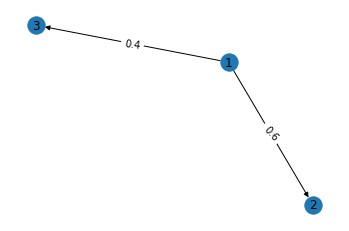

([1], [1, 2])

In [10]:
# test on small example, G_s
k = 1
plot_graph(G_s)
top_k(G_s,1),top_k(G_s,2)


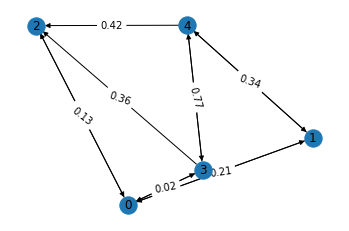

For directed graph, 2 initial seeds picked by random: [0, 4] with score: 4.34
For directed graph, 2 initial seeds picked by top_k: [0, 4] with score: 4.24


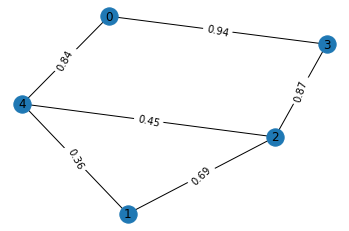

For undirected graph, 2 initial seeds picked by random: [0, 4] with score: 4.78
For undirected graph, 2 initial seeds picked by top_k: [0, 2] with score: 3.43


In [11]:
# compare random_pick vs top_k with simple graphs
G_di = build_instance(5,direction = True)
G_un = build_instance(5)
k = 2
plot_graph(G_di)
random_seed = random_pick(G_di,k)
top_seed = top_k(G_di,k)
print('For directed graph, 2 initial seeds picked by random:',random_seed,'with score:',independent_cascade(G_di,random_seed))
print('For directed graph, 2 initial seeds picked by top_k:',top_seed,'with score:',independent_cascade(G_di,top_seed))
plot_graph(G_un)
random_seed = random_pick(G_un,k)
top_seed = top_k(G_un,k)
print('For undirected graph, 2 initial seeds picked by random:',random_seed,'with score:',independent_cascade(G_un,random_seed))
print('For undirected graph, 2 initial seeds picked by top_k:',top_seed,'with score:',independent_cascade(G_di,top_seed))


### Experiment with ego_facebook from https://snap.stanford.edu/data/ 

In [445]:
def load_facebook(file_name, w = 0.1):
    '''build a graph with input file(gzip file), w is weight, same on all edges'''
    fb = pd.read_csv(file_name, compression='gzip',sep = ' ',header = None)
    G = nx.Graph()
    for index, row in fb.iterrows():
        G.add_node(row[0])
        G.add_node(row[1])
        G.add_edge(row[0],row[1],weight = w)
    return G

fb = load_facebook(file_name = "facebook_combined.txt.gz")


In [49]:
# a quick tester to estimate time needed for fb dataset
s = time.time()
independent_cascade(fb,[1],iters = 10)
e = time.time()
e - s

0.546705961227417

In [71]:
# fb using top_k
######### careful while re-run this cell #########
######### took 3441.5675230026245s to run this cell ###########
start = time.time()
top_k_candidate = top_k(fb,10)
end = time.time()
top_k_time = end - start 
top_k_candidate,top_k_time   

# result = [2317, 2654, 3072, 1848, 1694, 1396, 3089, 1668, 3009, 2460],

In [85]:
# greedy
def greedy(G,k,S0):
    '''input: G:network; k:number of output seed; S0:most influencial seed calculated by top k
        output: list of k most influencial seeds'''
    result = [S0]
    print('the top 1 influencial seed is',S0)
    for i in range(k-1):
        G.remove_node(result[-1])
        best_seed = top_k(G,1,10)[0]
        print('the top',i+2,'influencial seed is', best_seed)
        result.append(best_seed)
    return result

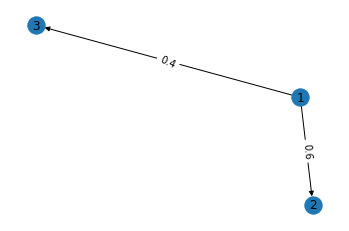

the 1 influencial seed is 2


[1, 2]

In [19]:
# test greedy with simple example
G_s = nx.DiGraph()
G_s.add_nodes_from(range(1,3))
G_s.add_edge(1,2,weight = 0.6)
G_s.add_edge(1,3,weight = 0.4)
plot_graph(G_s)
greedy(G_s,2,1)

### Random, Top_k and Greedy on the fixed weight fb network <br></br>
<li> Random

In [57]:
random_score = []  # list of eval score of k = [1,10] using random
for i in range(1,11):
    score = 0
    for j in range(5):  # sample 5 times to find avg score for each case
        seed = random_pick(fb,i)   
        score += independent_cascade(fb,seed)
    random_score.append(score/5)
    print(random_score)
random_score

[1130.694]
[1130.694, 2839.518]
[1130.694, 2839.518, 2935.4280000000003]
[1130.694, 2839.518, 2935.4280000000003, 2798.656]
[1130.694, 2839.518, 2935.4280000000003, 2798.656, 2899.3419999999996]
[1130.694, 2839.518, 2935.4280000000003, 2798.656, 2899.3419999999996, 2976.8480000000004]
[1130.694, 2839.518, 2935.4280000000003, 2798.656, 2899.3419999999996, 2976.8480000000004, 2965.916]
[1130.694, 2839.518, 2935.4280000000003, 2798.656, 2899.3419999999996, 2976.8480000000004, 2965.916, 2985.776]
[1130.694, 2839.518, 2935.4280000000003, 2798.656, 2899.3419999999996, 2976.8480000000004, 2965.916, 2985.776, 3002.0860000000002]
[1130.694, 2839.518, 2935.4280000000003, 2798.656, 2899.3419999999996, 2976.8480000000004, 2965.916, 2985.776, 3002.0860000000002, 3000.5099999999998]


[1130.694,
 2839.518,
 2935.4280000000003,
 2798.656,
 2899.3419999999996,
 2976.8480000000004,
 2965.916,
 2985.776,
 3002.0860000000002,
 3000.5099999999998]

<li> top_k

In [38]:
top_k_result = [2317, 2654, 3072, 1848, 1694, 1396, 3089, 1668, 3009, 2460]  # result from top_k(fb,10)
top_k_score = []
for i in range(len(top_k_result)):
    top_k_score.append(independent_cascade(fb,top_k_result[:i+1]))
top_k_score

[2869.66,
 2934.89,
 2933.33,
 2940.97,
 2928.17,
 2952.59,
 2945.62,
 2942.07,
 2926.69,
 2950.98]

<li> greedy

In [73]:
greedy_result = greedy(fb,10,top_k_result[0]) # with eval fcn independence_cascade(iters = 10)
greedy_result

'''result I got so far: 
the top 1 influencial seed is 2317
the top 2 influencial seed is 3384
the top 3 influencial seed is 1652
the top 4 influencial seed is 516'''

'result I got so far: \nthe top 1 influencial seed is 2317\nthe top 2 influencial seed is 3384\nthe top 3 influencial seed is 1652\nthe top 4 influencial seed is 516'

In [62]:
#re-load the graph, since some of nodes are deleted in greedy(fb,10,top_k_result[0])
fb = load_facebook(file_name = "facebook_combined.txt.gz")


greedy_result = [2317,3384,1652,516]   # only have result for first four cases
greedy_score = []
for i in range(len(greedy_result)):
    greedy_score.append(independent_cascade(fb,[greedy_result[i]]))
greedy_score

[2738.46, 2907.15, 2946.52, 2346.45]

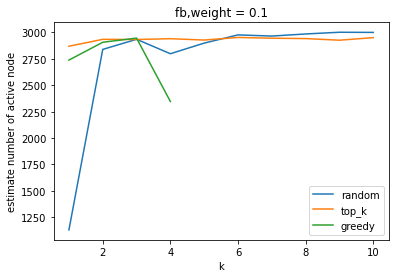

In [70]:
# plot 
x = np.arange(1,11)
x_greedy = np.arange(1,5)
plt.plot(x,random_score,label = 'random')
plt.plot(x,top_k_score,label = 'top_k')
plt.plot(x_greedy,greedy_score,label = 'greedy')
plt.xlabel('k')
plt.ylabel('estimate number of active node')

plt.title('fb,weight = 0.1')
plt.legend()
plt.show()

### 7/6

try to speed up the evaluation function

In [216]:
# generate a subgraph
def random_subgraph(G,iters = 100):
    ''' to randomly generate 100(default) subgraphs and return a set with all subgraphs''' 
    result = set()
    while len(result) <= iters:
        G_sub = nx.Graph()
        for edge in G.edges(data = True):
            if random.random() <= edge[2]['weight']:
                node1,node2,weight_ = edge
                G_sub.add_edge(node1,node2,weight = weight_['weight'])
        result.add(G_sub)
    return result

def evaluation(S,G_set):
    '''input intial seeds set S(list) and a set of randomly genereated subgraphs
    return estimated number of active node '''
    result = 0
    for G_sub in G_set:
        initial_S = set(copy.deepcopy(S))
        for c in nx.connected_components(G_sub):
            included = c.intersection(initial_S)
            if len(included) != 0:
                result += len(c)
                initial_S -= included
        result += len(initial_S)        
    return result/len(G_set)

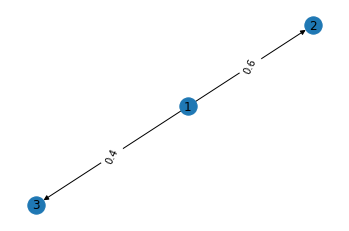

Evaluation score with random graphs(100): 2.089108910891089
Evaluation score with independent cascade(100): 1.93
Expected value: 2.0


In [219]:
# test evaluation with simple example
G_s = nx.DiGraph()
G_s.add_nodes_from(range(1,3))
G_s.add_edge(1,2,weight = 0.6)
G_s.add_edge(1,3,weight = 0.4)
plot_graph(G_s)
G_set = random_subgraph(G_s)
print('Evaluation score with random graphs(100):',evaluation([1],G_set))
print('Evaluation score with independent cascade(100):',independent_cascade(G_s,[1]))

print('Expected value:',2*0.6*0.6+2*0.4*0.4+1*0.6*0.4+3*0.6*0.4)

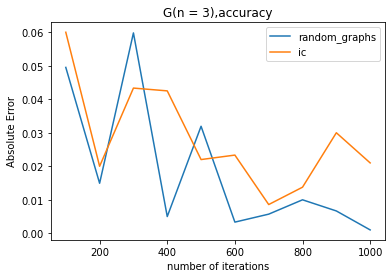

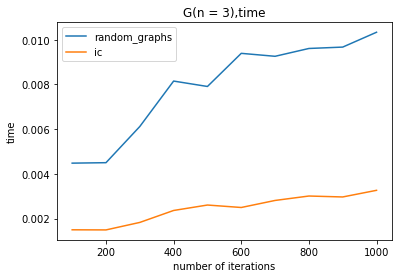

In [221]:
#quick comparision between two evaluation methods
def quick_comp(G_s):
    '''INPUT a graph and compare evaluation methods performace on the graph'''
    iters = np.arange(0,1001,100)[1:]
    sub_time = []
    ic_time = []
    y_sub = []
    y_ic = []
   # G_set = random_subgraph(G_s,100)
    for num in iters:
        # sub_graphs methos
        start = time.time()
        G_set = random_subgraph(G_s,num)
        y_sub.append(np.abs(evaluation([1],G_set)-2))

        end = time.time()
        sub_time.append(end - start)
        # IC
        start = time.time()
        y_ic.append(np.abs(independent_cascade(G_s,[1],num)-2))
        end = time.time()
        ic_time.append(end - start)

    #show in graphs
    plt.plot(iters,y_sub,label = 'random_graphs')
    plt.plot(iters,y_ic,label = 'ic')
    plt.xlabel('number of iterations')
    plt.ylabel('Absolute Error')
    plt.title('G(n = 3),accuracy')
    plt.legend()
    plt.show()

    plt.plot(iters,sub_time,label = 'random_graphs')
    plt.plot(iters,ic_time,label = 'ic')
    plt.xlabel('number of iterations')
    plt.ylabel('time')
    plt.title('G(n = 3),time')

    plt.legend()
    plt.show()
    
quick_comp(G_s)

In [352]:
#new top_k
def top_k(G,k,G_set):
    '''input: G:network; k:number of output seed; G_set: generated random subset
    return a list of top k most influencial seeds as a single intial seed'''
    candidate = dict() # a dictionary with key: seed name; value: expected number of active nodes
    for seed in G.nodes:
        candidate[seed] = evaluation([seed],G_set)
    # sort candidate by descending order of values (list of tuples)
    candidate_sort = sorted(candidate.items(),key = operator.itemgetter(1),reverse = True)
    return [seed[0] for seed in candidate_sort[:k]]

# greedy
def greedy(G,k,S0,G_set):
    '''input: G:network; k:number of output seed; S0:most influencial seed calculated by top k
        output: list of k most influencial seeds; score with k selected nodes'''
    result = [S0]
    result_score = [evaluation([S0],G_set)]
   # print('the top 1 influencial seed is',S0)
    for i in range(k-1):
        #G_set = random_subgraph(G,iters = 100)
        best_score = 0
        best_seed = 0
        for node in G.nodes():
            score = evaluation(result + [node],G_set)
            if score > best_score:
                best_score = score
                best_seed = node
        result.append(best_seed)
        result_score.append(best_score)
    return result,result_score


### Compare three methods on different graphs

In [405]:
def compare_three_methods(G):
    #generate set og subgraph
    G_set = random_subgraph(G)
    #random
    random_score = []  # list of eval score of k = [1,10] using random
    for i in range(1,11):
        score = 0
        for j in range(100):  # sample 10 times to find avg score for each case
            seed = random_pick(G,i)   
            score += evaluation(seed,G_set)
        random_score.append(score/100)
    #top k
    top_k_candidate = top_k(G,10,G_set)
    top_k_score = []
    for i in range(1,11):
        top_k_score.append(evaluation(top_k_candidate[:i],G_set))
    #greedy
    greedy_score = greedy(G,10,top_k_candidate[0],G_set)[1]
       # plot 
    x = np.arange(1,11)
    plt.plot(x,random_score,label = 'random')
    plt.plot(x,top_k_score,label = 'top_k')
    plt.plot(x,greedy_score,label = 'greedy')
    plt.xlabel('k')
    plt.ylabel('estimate number of active node')
    plt.legend()
    plt.show()


name the graph using G_sparsity_weight

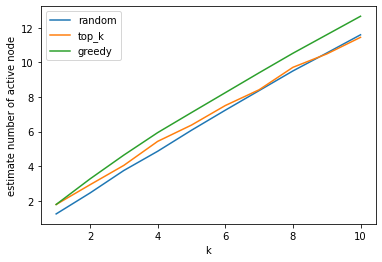

random: 1.036984920501709
top k: 0.03569602966308594
greedy: 0.09484696388244629


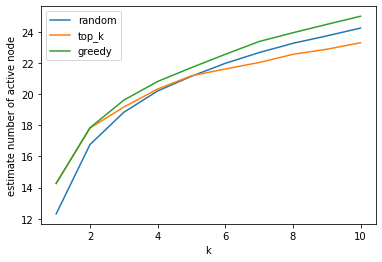

random: 2.3418869972229004
top k: 0.08802604675292969
greedy: 0.650115966796875


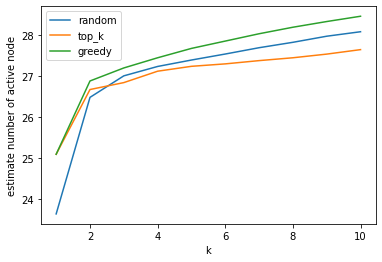

random: 2.394469976425171
top k: 0.0897362232208252
greedy: 0.44431591033935547


In [439]:
G_sparse_heavy = build_instance_weight(30,connect_pct = 0.1,fixed_weight = 0.1)
G_normal_heavy = build_instance_weight(30,connect_pct = 0.5,fixed_weight = 0.1)
G_dense_heavy = build_instance_weight(30,connect_pct = 0.8,fixed_weight = 0.1)

compare_three_methods(G_sparse_heavy,10)
compare_three_methods(G_normal_heavy,10)
compare_three_methods(G_dense_heavy,10)

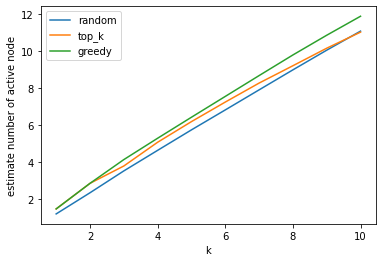

random: 0.8579273223876953
top k: 0.028598785400390625
greedy: 0.08424115180969238


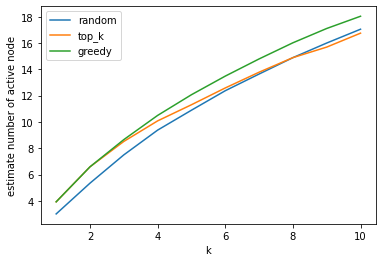

random: 1.964656114578247
top k: 0.07142090797424316
greedy: 0.516218900680542


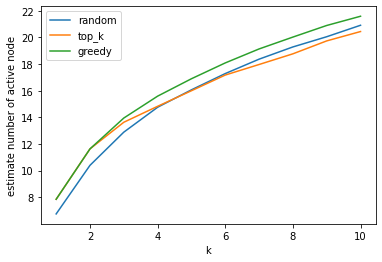

random: 2.194272994995117
top k: 0.08031105995178223
greedy: 0.6700868606567383


In [440]:
G_sparse_normal = build_instance_weight(30,connect_pct = 0.1,fixed_weight = 0.05)
G_normal_normal = build_instance_weight(30,connect_pct = 0.5,fixed_weight = 0.05)
G_dense_normal = build_instance_weight(30,connect_pct = 0.8,fixed_weight = 0.05)

compare_three_methods(G_sparse_normal,10)
compare_three_methods(G_normal_normal,10)
compare_three_methods(G_dense_normal,10)

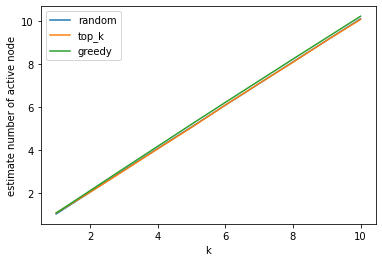

random: 0.4898648262023926
top k: 0.01435232162475586
greedy: 0.032785892486572266


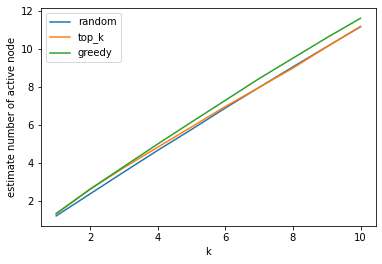

random: 0.8973517417907715
top k: 0.030182361602783203
greedy: 0.1192467212677002


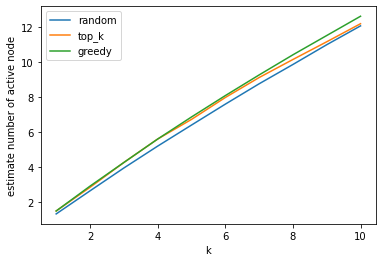

random: 1.1690418720245361
top k: 0.040930986404418945
greedy: 0.20202994346618652


In [441]:
G_sparse_light = build_instance_weight(30,connect_pct = 0.1,fixed_weight = 0.01)
G_normal_light = build_instance_weight(30,connect_pct = 0.5,fixed_weight = 0.01)
G_dense_light = build_instance_weight(30,connect_pct = 0.8,fixed_weight = 0.01)

compare_three_methods(G_sparse_light,10)
compare_three_methods(G_normal_light,10)
compare_three_methods(G_dense_light,10)

### Lazy Greedy

In [ ]:
# greedy
def greedy(G,k,S0,G_set):
    '''input: G:network; k:number of output seed; S0:most influencial seed calculated by top k
        output: list of k most influencial seeds; score with k selected nodes'''
    result = [S0]
    result_score = [evaluation([S0],G_set)]
   # print('the top 1 influencial seed is',S0)
    for i in range(k-1):
        #G_set = random_subgraph(G,iters = 100)
        best_score = 0
        best_seed = 0
        for node in G.nodes():
            score = evaluation(result + [node],G_set)
            if score > best_score:
                best_score = score
                best_seed = node
        result.append(best_seed)
        result_score.append(best_score)
    return result,result_score

In [411]:
def lazy_greedy(G,k,S0,G_set):
    '''lazy greedy return first k initial seeds and marginal gain for each newly added seed'''
    result = []
    mg = []
    candidates = {}
    iteration = 1
    for node in G.nodes():
        candidates[node] = {'mg':evaluation([node],G_set),'i':1}
    while iteration <= k:
        current_node = max(candidates.items(),key = lambda x:x[1]['mg']) # current_node: (12, {'mg': 1.9405940594059405, 'i': 1})
        node_name = current_node[0]
        node_info = current_node[1]
        if node_info['i'] == iteration:
            result.append(node_name)
            mg.append(node_info['mg'])
            candidates.pop(node_name)
            iteration += 1
        else:
            node_info['mg'] = evaluation(result+[node_name],G_set) -  evaluation(result,G_set)
            node_info['i'] = iteration
    return result,mg

#### Test Lazy_greedy


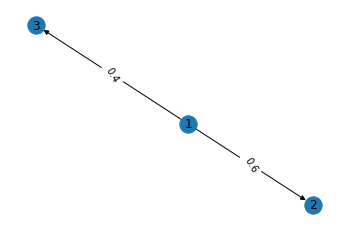

[1, 3]

In [385]:
G_s = nx.DiGraph()
G_s.add_nodes_from(range(1,3))
G_s.add_edge(1,2,weight = 0.6)
G_s.add_edge(1,3,weight = 0.4)
plot_graph(G_s)
G_set = random_subgraph(G_s)
lazy_greedy(G_s,2,1,G_set)

In [412]:
G = build_instance(17,direction = False,connect_pct = 0.2)
#plot_graph(G)
k = 10
G_set = random_subgraph(G)
S0 = top_k(G,1,G_set)[0]
lazy_greedy(G,k,S0,G_set),greedy(G,k,S0,G_set)

(([11, 16, 13, 14, 2, 4, 3, 0, 6, 5],
  [8.801980198019802,
   1.990099009900991,
   1.2673267326732667,
   1.0396039603960396,
   0.9603960396039604,
   0.9009900990099009,
   0.7623762376237622,
   0.5346534653465334,
   0.20792079207921077,
   0.13861386138613696]),
 ([11, 16, 13, 14, 2, 4, 3, 0, 6, 5],
  [8.801980198019802,
   10.792079207920793,
   12.05940594059406,
   13.099009900990099,
   14.05940594059406,
   14.96039603960396,
   15.722772277227723,
   16.257425742574256,
   16.465346534653467,
   16.603960396039604]))

#### Compare Greedy vs Lazy Greedy in time

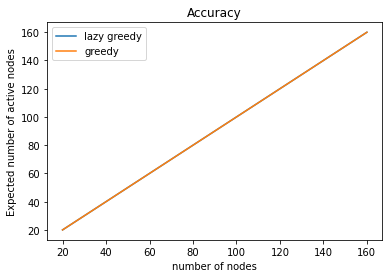

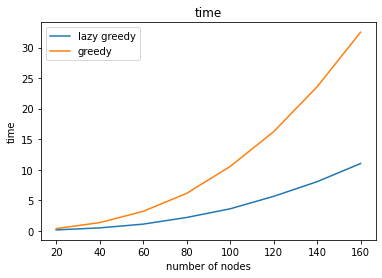

In [388]:
iters = np.arange(0,161,20)[1:]
k = 10
g_time = []
lg_time = []
g_score = []
lg_score = []
for num in iters:
    G = build_instance(num,direction = False,connect_pct = 0.8)
    G_set = random_subgraph(G)
    S0 = top_k(G,1,G_set)[0]
    # lazy greedy
    start = time.time()
    lg_candidate = lazy_greedy(G,k,S0,G_set)
    end = time.time()
    lg_time.append(end - start)
    lg_score.append(evaluation(lg_candidate,G_set))
    # greedy
    start = time.time()
    g_score.append(greedy(G,k,S0,G_set)[1][-1])
    end = time.time()
    g_time.append(end - start)

#show in graphs
plt.plot(iters,lg_score,label = 'lazy greedy')
plt.plot(iters,g_score,label = 'greedy')
plt.xlabel('number of nodes')
plt.ylabel('Expected number of active nodes')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(iters,lg_time,label = 'lazy greedy')
plt.plot(iters,g_time,label = 'greedy')
plt.xlabel('number of nodes')
plt.ylabel('time')
plt.title('time')

plt.legend()
plt.show()

#### apply lazy greedy on larger network

In [415]:
def lg_time(n,connect_pct_,weight_,k):
    '''input info about a graph(n:number of node,connect_pct_: sparsity of the graph,weight
    plot a graph of marginal gain of each newly added node, and time needed'''
    G = build_instance_weight(n,direction = False,connect_pct = connect_pct_,fixed_weight = weight_)
    #plot_graph(G)
    start = time.time()
    G_set = random_subgraph(G)
    S0 = top_k(G,1,G_set)[0]
    lg_candidate,mg = lazy_greedy(G,k,S0,G_set)
    end = time.time()
    x = np.arange(1,k+1)
    plt.plot(x,mg)
    plt.xlabel('ith node')
    plt.ylabel('marginal gain')
    return end - start

93.73836994171143

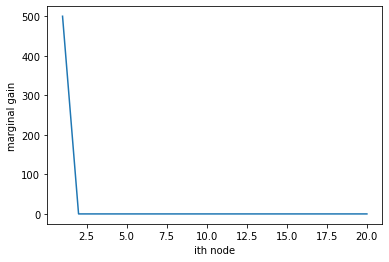

In [443]:
lg_time(500,0.2,0.1,20)

384.50090503692627

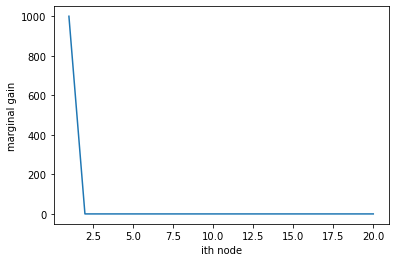

In [444]:
lg_time(1000,0.1,0.1,20)

### compare three methods on a lazy greedy

In [449]:
def compare_three_methods(G,k):
    #generate set of subgraph
    G_set = random_subgraph(G)
    #random
    random_start = time.time()
    random_score = []  # list of eval score of k = [1,10] using random
    for i in range(1,k+1):
        score = 0
        for j in range(100):  # sample 10 times to find avg score for each case
            seed = random_pick(G,i)   
            score += evaluation(seed,G_set)
        random_score.append(score/100)
    random_end = time.time()

    #top k
    top_k_start = time.time()
    top_k_candidate = top_k(G,k,G_set)
    top_k_score = []
    for i in range(1,k+1):
        top_k_score.append(evaluation(top_k_candidate[:i],G_set))
    top_k_end = time.time()

    #greedy
    greedy_start = time.time()
    greedy_candidate,greedy_mg = lazy_greedy(G,k,top_k_candidate[0],G_set)
    greedy_score = []
    for i in range(1,k+1):
        greedy_score.append(sum(greedy_mg[:i]))
    greedy_end = time.time()

       # plot 
    x = np.arange(1,k+1)
    plt.plot(x,random_score,label = 'random')
    plt.plot(x,top_k_score,label = 'top_k')
    plt.plot(x,greedy_score,label = 'greedy')
    plt.xlabel('k')
    plt.ylabel('estimate number of active node')
    plt.legend()
    plt.show()
    print('random:', random_end - random_start)
    print('top k:', top_k_end - top_k_start)
    print('greedy:', greedy_end - greedy_start)
    return top_k_candidate,greedy_candidate

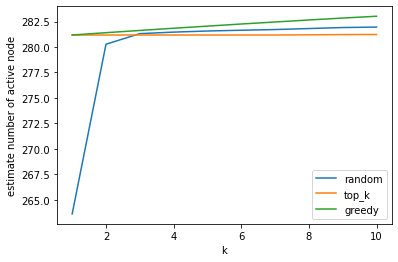

random: 21.14684009552002
top k: 6.447020053863525
greedy: 19.491854190826416


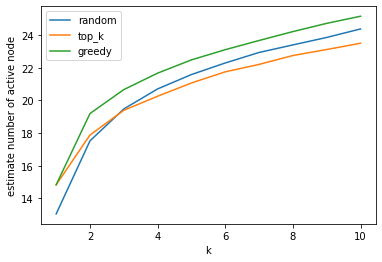

random: 2.314870834350586
top k: 0.08651399612426758
greedy: 0.611443042755127


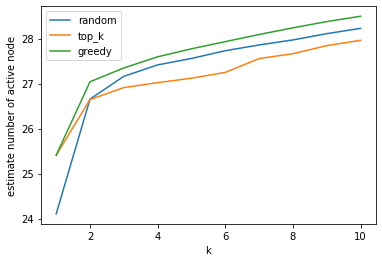

random: 2.5461790561676025
top k: 0.09421491622924805
greedy: 0.4581320285797119


In [442]:
G_sparse_heavy = build_instance_weight(300,connect_pct = 0.1,fixed_weight = 0.1)
G_sparse_normal = build_instance_weight(300,connect_pct = 0.1,fixed_weight = 0.05)
G_sparse_light = build_instance_weight(300,connect_pct = 0.1,fixed_weight = 0.01)
compare_three_methods(G_sparse_heavy,10)
compare_three_methods(G_normal_heavy,10)
compare_three_methods(G_dense_heavy,10)


#### test lazy greedy with facebook_network


In [446]:
S0 = 2317
k = 10
#fb = load_facebook(file_name = "facebook_combined.txt.gz")

G_set = random_subgraph(fb)
start = time.time()
greedy_result = lazy_greedy(G,k,S0,G_set)
end = time.time()
greedy_result,end-start



(([0, 14, 4, 6, 8, 2, 11, 12, 15, 5],
  [2653.8514851485147,
   3.3960396039606167,
   1.4158415841584429,
   1.2970297029701214,
   1.2772277227722952,
   1.0297029702969667,
   0.9504950495052071,
   0.9306930693069262,
   0.8712871287125381,
   0.5247524752476238]),
 24.23633885383606)

In [ ]:
compare_three_methods(fb,10)